# Workflow
1. Pandas 설치
2. 데이터 읽기
3. 데이터 전처리

[Pandas 공식 문서](https://pandas.pydata.org/docs/user_guide/io.html)



# 1. pandas 설치

- 방법1-1: command에서 `pip3 install pandas`
- 방법1-2: notebook cell에서 `!pip3 install pandas`
- 방법2: IDE(pycharm)를 통한 설치



In [1]:
'''
아래 코드 실행
jupyter notebook에서 셀 실행방법
    하나의 셀 실행 : ctrl+enter
    하나의 셀 실행 후 다음 셀로 이동: shift+enter
'''

!pip3 install pandas

# 2. 데이터 읽기




In [2]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 현재 경로 확인
import os
print(os.path.abspath(os.curdir))

/content


In [4]:
# Root 경로 설정
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/3days_ml/')

## 1) 데이터 읽기
- csv 파일: pd.read_csv
- txt 파일: pd.read_table
- 자세한 내용은 공식문서 참조: [링크](https://pandas.pydata.org/docs/user_guide/io.html)

In [5]:
import pandas as pd
path_to_data = './data/Titanic/train.csv'
df = pd.read_csv(path_to_data, encoding='cp949')


## 2) 데이터 타입
- pd.DataFrame: 테이블 - n rows * p columns
- pd.Series: 컬럼(변수) - n rows * 1 column (DataFrame 내 하나의 컬럼)



In [7]:
# DataFrame type 확인
type(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Series type 확인
# DataFrame의 column 중 하나인 PassengerId를 선택
df_HID_ACNO = df['PassengerId']
type(df_HID_ACNO) 

pandas.core.series.Series

# 3. 데이터 전처리 1


## 1) 타입 변환 
- dataframe/series`.value`
- dataframe/series`.value.tolist()`
- series`.to_frame()`




In [ ]:
# DataFrame 확인
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# DataFrame을 numpy array set( = matrix)으로 변환
df.values # 동일구문: df.as_matrix()

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [ ]:
# Series 확인
df['PassengerId'].head()

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [ ]:
# Series를 numpy array로 변환
df['PassengerId'].values[:5]

array([1, 2, 3, 4, 5])

In [ ]:
# numpy array를 list로 변환
df['PassengerId'].values.tolist()[:5]

[1, 2, 3, 4, 5]

In [ ]:
# to_frame() 활용
# Series를 dataframe화 할 수 있음
df['PassengerId'].to_frame().head()

,PassengerId
0,1
1,2
2,3
3,4
4,5



## 2) 데이터 인덱스
dataframe의 특정 Columns / Row를 선택 방법

1) column 선택 방법
  - dataframe`[column 이름]`
  - dataframe`.loc[:,column이름]`
  - dataframe.`iloc[:,column순서]`

2) row
  - dataframe`.loc[row이름]`
  - dataframe.`iloc[rown순서]`

**주의사항: 보통의 경우, row 이름과 row 순서가 같다. 하지만, 중간에 열을 삭제하는 경우, row 이름과 row 순서가 달라질 수 있음을 주의해야 한다.**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# row 인덱스: 0부터 오름차순 숫자
df.index

RangeIndex(start=0, stop=891, step=1)

In [ ]:
# column 인덱스: 컬럼명
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# column 읽기 1) 컬럼 이름
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
# column 읽기 2) loc
df.loc[:,'Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
# column 읽기 3) iloc
# Name은 4번째에 위치한 컬럼(= index: 3)
df.iloc[:,3].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
# row 읽기 1) loc # row index의 이름으로 읽는다
df.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [ ]:
# row 읽기 2) iloc
df.iloc[0].head()

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Name: 0, dtype: object

In [ ]:
# 인덱스의 음수는 마지막 row or column을 기준으로 순서를 나타냄
df.iloc[-1].head()

PassengerId                    891
Survived                         0
Pclass                           3
Name           Dooley, Mr. Patrick
Sex                           male
Name: 890, dtype: object


## 3) row, columns 제거
- drop은 원하는 column / row 을 지울 수 있음
- 혹은 null값이나 중복값을 제거하는 함수를 통해 손쉬운 데이터 제거가 가능
1. 원하는 값 제거: drop
2. Null 제거: dropna
3. 중복제거: drop_duplicates




In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# columns 제거: 컬럼명 + axis=1이라는 옵션을 지정(default: axis=0 (행 기준))
df.drop('PassengerId', axis=1).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# row 제거: row 인덱스를 지정
df.drop(0, axis=0).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
# null값이 하나이상 존재하는 row를 제거
print(df.shape) # null 제거 전 데이터 크기
print(df.dropna().shape) # null 제거 후 데이터 크기


(891, 12)
(183, 12)


In [ ]:
# 동일한 row가 있는 경우 제거
# 데이터에는 동일한 row가 없음
print(df.shape) # null 제거 전 데이터 크기
print(df.drop_duplicates().shape) # null 제거 후 데이터 크기


(891, 12)
(891, 12)


## 4) 인덱스 처리
- reset_index: 현재 DataFrame의 인덱스를 0부터 n까지의 정수로 초기화 하고싶을때
- set_index: 현재 DataFrame의 인덱스를 특정 컬럼으로 바꾸고 싶을때

In [ ]:
# 1번 row를 제거
# 인덱스가 불연속
df.drop(1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
# 인덱스 초기화
# 기존의 인덱스는 index라는 별도의 컬럼으로 존재
# .reset_index(drop=True) 옵션을 줄 경우 index 별도 컬럼도 제거됨
df.drop(1).reset_index().head() 

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
df.drop(1).reset_index(drop=True).head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
# 고객번호를 인덱스로 사용하려면 set_index에 컬럼 이름을 넣으면 완료, 
df.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 5) 데이터 정렬

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.sort_values(by='Age').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [ ]:
df.sort_values(by='Age', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


# 데이터 전처리 2


## 1) 자료 요약
- value_counts: `select count(컬럼명) from Table groupby 컬럼명` 과 동일



In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64


## 2)문자열 전처리
- str.strip: 앞 뒤 공백 제거
- str.upper / str.lower: 대소문자 변경
- split: 텍스트 분리
- regular exrpession
    - str.replace: 교체
    - str.match: 검색
    - str.contains: 검색



In [ ]:
# 데이터 Name 컬럼 일부
df.loc[[15,857],'Name']

15     Hewlett, Mrs. (Mary D Kingcome) 
857              Daly, Mr. Peter Denis 
Name: Name, dtype: object

In [ ]:
# array로 변환하여 공백이 있음을 확인(dataframe print 결과로는 공백 확인불가능)
df.loc[[15,857],'Name'].values

array(['Hewlett, Mrs. (Mary D Kingcome) ', 'Daly, Mr. Peter Denis '],
      dtype=object)

In [ ]:
# str.strip을 통해 공백 제거
df.loc[[15,857],'Name'].str.strip().values

array(['Hewlett, Mrs. (Mary D Kingcome)', 'Daly, Mr. Peter Denis'],
      dtype=object)

In [ ]:
# 알파벳 소문자
df['Name'].str.lower().head()

0                              braund, mr. owen harris
1    cumings, mrs. john bradley (florence briggs th...
2                               heikkinen, miss. laina
3         futrelle, mrs. jacques heath (lily may peel)
4                             allen, mr. william henry
Name: Name, dtype: object

In [ ]:
# 알파벳 대문자
df['Name'].str.upper().head()

0                              BRAUND, MR. OWEN HARRIS
1    CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                               HEIKKINEN, MISS. LAINA
3         FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                             ALLEN, MR. WILLIAM HENRY
Name: Name, dtype: object

In [ ]:
# 데이터 분할
df['Name'].str.split(" ").head()

0                         [Braund,, Mr., Owen, Harris]
1    [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                           [Heikkinen,, Miss., Laina]
3    [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                        [Allen,, Mr., William, Henry]
Name: Name, dtype: object

In [ ]:
# 데이터 교체
df['Name'].str.replace("Mr","Mister")

0                            Braund, Mister. Owen Harris
1      Cumings, Misters. John Bradley (Florence Brigg...
2                                 Heikkinen, Miss. Laina
3       Futrelle, Misters. Jacques Heath (Lily May Peel)
4                           Allen, Mister. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                            Behr, Mister. Karl Howell
890                              Dooley, Mister. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
df['Name'].loc[0]

'Braund, Mr. Owen Harris'

In [ ]:
# 이름중에 aund가 들어간 row의 경우 True 반환
df['Name'].str.contains("aund")

0       True
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

In [ ]:
# 이름중에 aund가 정확히 들어간 row의 경우 True 반환
df['Name'].str.match("aund")

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

## 3) apply
- function을 모든 row나 column에 동일하게 적용
    - map: Series에서 사용
    - apply: DataFrame에 적용

In [ ]:
# Age 컬럼
# 실수형 타입 float64 
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
# for문을 통해 age 컬럼의 데이터 타입을 정수형으로 변경
[int(i) for i in df['Age'].dropna().values][:5]

[22, 38, 26, 35, 35]

In [ ]:
# map 함수를 통해 데이터 타입을 정수형으로 변경
df['Age'].dropna().map(lambda x: int(x)).head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int64

In [ ]:
# apply
# 원하는 연산을 row나 column 단위로 수행할 수 있음

df_p = df[['Sex','Name']]

print("join 전")
print(df_p.head())

df_p_j = df_p.apply(lambda row: " / ".join(row), axis=1)
print("\njoin 후")
print(df_p_j.head())

join 전
      Sex                                               Name
0    male                            Braund, Mr. Owen Harris
1  female  Cumings, Mrs. John Bradley (Florence Briggs Th...
2  female                             Heikkinen, Miss. Laina
3  female       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4    male                           Allen, Mr. William Henry

join 후
0                       male / Braund, Mr. Owen Harris
1    female / Cumings, Mrs. John Bradley (Florence ...
2                      female / Heikkinen, Miss. Laina
3    female / Futrelle, Mrs. Jacques Heath (Lily Ma...
4                      male / Allen, Mr. William Henry
dtype: object


## 4) 시간타입 전처리
- pd.to_datetime
- dt_range


In [ ]:
# 임의의 시간데이터 생성
import numpy as np
dfu = pd.DataFrame({"time" : np.random.sample(50)*2000000000})
dft = dfu.apply(lambda x: pd.to_datetime(x, unit='s'))
dft.head()

,time
0,2019-09-20 07:52:38.017397881
1,2021-01-27 17:33:29.974700689
2,2006-04-07 10:10:04.589626551
3,2016-11-11 22:06:33.466853619
4,1977-05-09 11:40:53.537688136


In [ ]:
# 'FLT_DATE'를 yyyy-mm-dd timestamp형식으로 변경
# timestamp의 api를 사용히여
# year, month, day 추출

time = pd.to_datetime(dft['time'],  format='%Y%m%d')
print(time.head())
print(time.dt.year.head())
print(time.dt.month.head())
print(time.dt.day.head())

0   2019-09-20 07:52:38.017397881
1   2021-01-27 17:33:29.974700689
2   2006-04-07 10:10:04.589626551
3   2016-11-11 22:06:33.466853619
4   1977-05-09 11:40:53.537688136
Name: time, dtype: datetime64[ns]
0    2019
1    2021
2    2006
3    2016
4    1977
Name: time, dtype: int64
0     9
1     1
2     4
3    11
4     5
Name: time, dtype: int64
0    20
1    27
2     7
3    11
4     9
Name: time, dtype: int64


In [ ]:
# dt_range
dt_range = pd.date_range(start="2018-06-29", end="2019-04-19").to_frame()
dt_range.head()

,0
2018-06-29,2018-06-29
2018-06-30,2018-06-30
2018-07-01,2018-07-01
2018-07-02,2018-07-02
2018-07-03,2018-07-03


## 5) 그래프
- 그래프
- 히스토그램


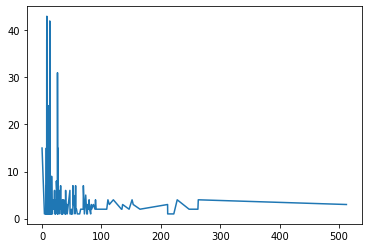

In [9]:
# 시각화를 원하는 DataFrame이나 Series에 plot() 함수 사용
df['Fare'].value_counts().sort_index().plot()

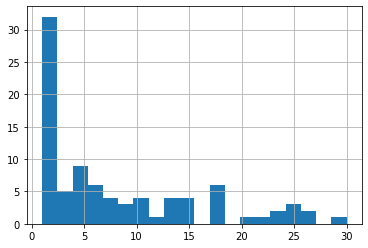

In [ ]:
# 히스토그램
# default: bin=10
# 데이터의 분포 확인등에 사용
df['Age'].value_counts().sort_index().hist(bins=20)

1970-04-11 19:35:29.175949944    13
1970-05-14 03:53:09.116370218    16
1971-04-11 21:55:35.249125488    28
1971-10-30 00:58:35.250758737    13
1972-03-01 06:43:31.073926449    13
Name: time, dtype: int64


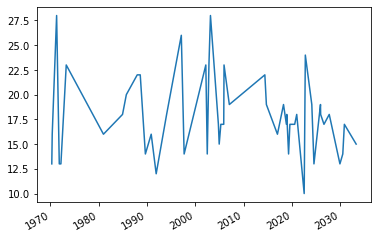

In [ ]:
# 날짜별 데이터 count 시각화
# 시계열 데이터를 보는 경우가 많음
# value_count등으로 전처리 후 데이터 확인 및 시각화를 진행함
# 하지만, 데이터가 많을 경우, 중간에 없는 날짜가 생길 수 있음. 눈으로 확인할 수 없음
df['time'] = dft.sample(df.shape[0], replace=True).reset_index(drop=True)
print(df['time'].value_counts().sort_index().head())
df['time'].value_counts().sort_index().plot()


y1 = age / y2 = fare
서로 다른 scale
    Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


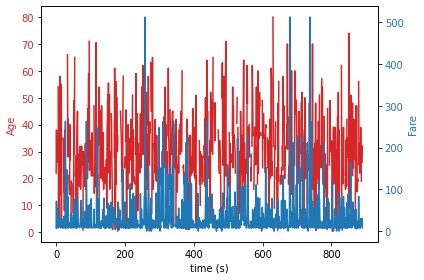

In [ ]:
# 기타
# 2개의 y 범위가 서로 다를때
import numpy as np
import matplotlib.pyplot as plt

# create data
tmp = df[['Age','Fare']]
print("y1 = age / y2 = fare")
print("서로 다른 scale")
print(tmp.head())

# ready for plotting
fig, ax1 = plt.subplots()
color1 = 'tab:red'
color2 = 'tab:blue'

# x-axis
ax1.set_xlabel('time (s)')

# left y-axis
ax1.set_ylabel('Age', color=color1)
tmp['Age'].plot(ax=ax1, color=color1) # (= ax1.plot(tmp.index, tmp['a'], color=color))
ax1.tick_params(axis='y', labelcolor=color1)

# right y-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Fare', color=color2)
tmp['Fare'].plot(ax=ax2, color=color2) # (= ax2.plot(tmp.index, tmp['b'], color=color))
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped


## 6) groupby
- groupby
- groupby grp


In [ ]:
# Pclass별 탑승자 수 count
df.groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,time
Pclass,,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214,216
2,184,184,184,184,173,184,184,184,184,16,184,184
3,491,491,491,491,355,491,491,491,491,12,491,491


In [ ]:
# Pclass + Sex 별 탑승자 수 count
df.groupby(["Pclass","Sex"]).count()

PassengerId  Survived  Name  Age  ...  Fare  Cabin  Embarked  time
Pclass Sex                                       ...                             
1      female           94        94    94   85  ...    94     81        92    94
       male            122       122   122  101  ...   122     95       122   122
2      female           76        76    76   74  ...    76     10        76    76
       male            108       108   108   99  ...   108      6       108   108
3      female          144       144   144  102  ...   144      6       144   144
       male            347       347   347  253  ...   347      6       347   347

[6 rows x 11 columns]

In [ ]:
# 데이터 Group 후 apply를 이용하여 전처리를 진행할 수 있다
df.groupby("Pclass").apply(lambda grp: grp['Sex'].value_counts())

Sex,male,female
Pclass,,
1,122,94
2,108,76
3,347,144



## 7) 병합
- pd.concat: 두개 이상의 DataFrame or Series를 column방향 or row방향으로 붙이는 방법
- pd.merge:  일반적인 merge
    - on, how
    - right_index, left_index


In [ ]:
df_age = df['Age']
df_sex = df['Sex']

In [ ]:
# Series 결합
# Age와 Sex 컬럼의 결합
# axis = 1은 컬럼 결합? -> 방향
# 같은 index끼리 결합되기 때문에 index에 대한 주의 필요 
pd.concat([df_age, df_sex], axis=1)

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,female
888,NaN,female
889,26.0,male


In [ ]:
# merge
# merge 를 위한 Age 기준의 데이터 2개 생성
df_gb_count = df.groupby('Age').count()['Fare']
df_gb_mean = df.groupby('Age')['Fare'].mean()

print(df_gb_count.head())
print(df_gb_mean.head())

Age
0.42    1
0.67    1
0.75    2
0.83    2
0.92    1
Name: Fare, dtype: int64
Age
0.42      8.5167
0.67     14.5000
0.75     19.2583
0.83     23.8750
0.92    151.5500
Name: Fare, dtype: float64


In [ ]:
# merge: index 기준
pd.merge(df_gb_count, df_gb_mean, right_index=True, left_index=True).head()

,Fare_x,Fare_y
Age,,
0.42,1,8.5167
0.67,1,14.5000
0.75,2,19.2583
0.83,2,23.8750
0.92,1,151.5500


In [ ]:
# merge: column명 기준
# how를 통해, left join, right join 등을 선택할 수 있다.
pd.merge(df_gb_count.reset_index(), df_gb_mean.reset_index(), on='Age', how='outer').head()

,Age,Fare_x,Fare_y
0,0.42,1,8.5167
1,0.67,1,14.5000
2,0.75,2,19.2583
3,0.83,2,23.8750
4,0.92,1,151.5500
